<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# **Proyecto Data Science 74545**
## Fraude en Transacciones: EDA y Principales Hallazgos

## 1. **Abstract**

En la actualidad, el fraude en transacciones financieras es un desafío que las empresas deben monitorear con métricas clave para tomar decisiones efectivas y proteger su rentabilidad.

El objetivo fue analizar variables críticas que podrían influir en la ocurrencia de fraudes, evaluando su comportamiento individual y su relación con la variable objetivo. El dataset contiene 51,000 registros y 12 variables sobre transacciones, siendo Fraudulent la variable que indica si una transacción es fraudulenta.

Nos propusimos responder preguntas como: ¿los fraudes ocurren en montos más altos?, ¿las cuentas nuevas tienen más probabilidad de fraude?, y ¿el número de transacciones en 24 horas es un factor determinante?

Entre las hipótesis planteadas destacamos que la antigüedad de la cuenta, la frecuencia de transacciones recientes y el monto podrían tener una relación significativa con la probabilidad de fraude.

Para ello, utilizamos herramientas de visualización como histogramas, boxplots, gráficas de barras y heatmaps mediante matplotlib y seaborn.

Del análisis exploratorio se concluyó que las transacciones fraudulentas tienden a concentrarse en montos específicos, ocurren con mayor frecuencia en cuentas recientes y en clientes con alta actividad transaccional en cortos períodos de tiempo. Además, se detectó un desbalance en la variable objetivo que requerirá ser tratado antes del modelado.

# 2. **Preguntas e Hipótesis/Problema que buscamos resolver**

## **Hipótesis**
1. Transacciones con montos elevados son más propensas a ser fraudulentas.
2. Las transacciones desde dispositivos móviles presentan menor riesgo de fraude que desde web.

## **Preguntas de investigación**
1. ¿Existe una relación significativa entre el monto de la transacción y la probabilidad de fraude?
2. ¿El riesgo de fraude varía dependiendo del tipo de dispositivo utilizado (móvil vs web)?
3. ¿Los clientes nuevos tienen una mayor probabilidad de realizar transacciones fraudulentas?

## Importación del dataset

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [4]:
# Importación del dataset
file_path = "C:/Users/bmtha/Downloads/Datasets/Fraud Detection Dataset.csv"

df = pd.read_csv(file_path)

## 3. **Breve Análisis Exploratorio de Datos (EDA)**

In [5]:
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


#Descripción de columnas
**Transaction_ID:** Identificador único de la transacción (tipo: numérico).

**Customer_ID:** Identificador único del cliente (tipo: numérico).

**Transaction_Amount:** Monto de la transacción realizada (tipo: numérico, puede tener sesgo positivo).

**Transaction_Date:** Fecha y hora de la transacción (tipo: fecha/hora).

**Merchant_ID:** Identificador único del comercio donde se realizó la compra (tipo: numérico/categórico).

**Merchant_Category:** Categoría del comercio (tipo: categórico, ejemplo: 'Electronics', 'Grocery').

**Transaction_Location:** Ubicación de la transacción (tipo: categórico, podría ser ciudad o región).

**Device_Type:** Tipo de dispositivo utilizado para la transacción (tipo: categórico, ejemplo: 'Mobile', 'Web').

**Fraudulent:** Variable objetivo (0 = transacción legítima, 1 = transacción fraudulenta).

In [6]:
# Info general
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

### **Insights 1**

- Primero, confirmé que no hay valores nulos en ninguna de las columnas, lo que me permite avanzar sin tener que imputar o eliminar datos faltantes, lo cual es positivo para la integridad del análisis.

- Hay que destacar que hay valores faltantes en algunos, aunque no es una cantidad que impacte la investigación. En variables categoricas rellenaremos con la moda y en las numericas sustituiremos con la media. 

- Mayoría de variables están correctamente tipificadas. La columna Transaction_Date está como tipo "object", por lo que será necesario convertirla a tipo datetime para realizar análisis temporales más adelante.

- Analizando los campos básicos, observé que Transaction_Amount tiene una mmedia mucho menor que el valor máximo, lo que me indica que hay presencia de outliers o montos muy altos en pocas transacciones. Esto sugiere un sesgo positivo en la distribución de los montos.

- En el campo Account_Age, aunque inicialmente esperaba un rango mucho más grande, encontré que el máximo es 119 días. Esto no representa una dispersión extrema, pero sí es suficiente para distinguir entre cuentas recién creadas y otras más establecidas.

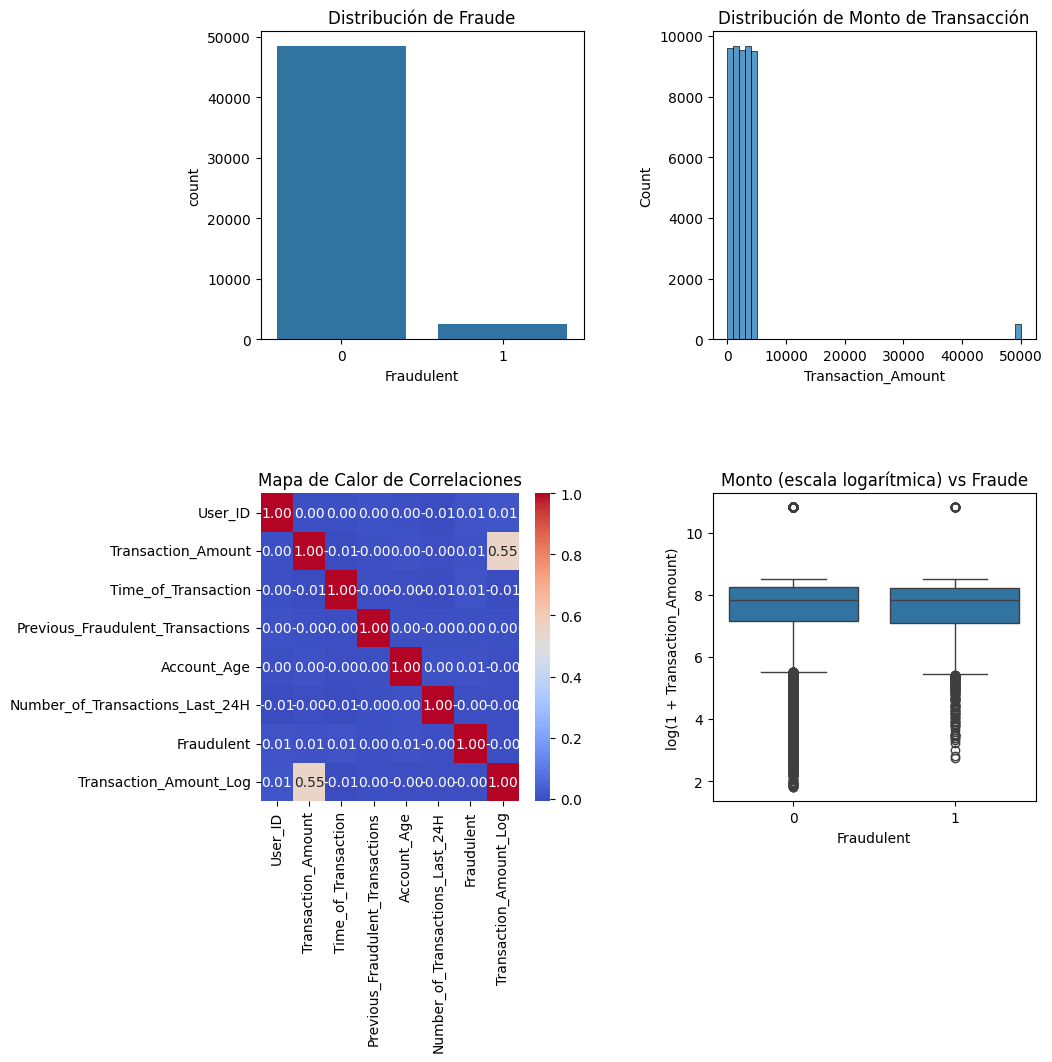

In [7]:
# Separación de gráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Boxplot: Monto vs Fraude
df['Transaction_Amount_Log'] = np.log1p(df['Transaction_Amount'])  # log1p para evitar log(0)
sns.boxplot(x='Fraudulent', y='Transaction_Amount_Log', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Monto (escala logarítmica) vs Fraude')
axes[1, 1].set_ylabel('log(1 + Transaction_Amount)')

# Distribución target
sns.countplot(x='Fraudulent', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Fraude')

# Histograma de montos
sns.histplot(df['Transaction_Amount'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Monto de Transacción')

# Correlación numéricas
num_cols = df.select_dtypes(include='number')
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Mapa de Calor de Correlaciones')

# Ajustar el espacio entre subgráficos
plt.subplots_adjust(hspace=0.5, wspace=0.4)

plt.show()


### **Insights 2**

- No logré encontrar otras relaciones claras usando el heatmap por lo que realicé gráficos para observar la distribución de algunas campos y otros que apriori pensé que podrían estar relacionados como el monto y las transacciones fraudulentas.

- Luego de analizar los campos que más llamaron mi atención con gráficos, noto que está muy desbalanceado debido a la cantidad de transacciones fraudulentas vs las no fraudulentas.

- También se nota asimetría a la derecha en el grafico de monto de las transacciones, confirmando que la mayor parte de las transacciones son pequeñas.

- Con el boxplot, hice transformación usando log para visualizarlo mejor. Intenté encontrar un comportamiento extraño entre transacciones fraudulentas y los montos. Pude observar que los fraudes tienden a tener montos bajos (probablemente para pasar desapercibidos) pero existen excepciones. Asimismo, la mayor parte de las transacciones no fraudulentas casi nunca salen de los montos bajos.



* Transformaciones correspondientes si hicieran falta (nulos, modificar nombres de variables, etc)

# 4. **Ingeniería de atributos**

In [8]:
# Hacemos copia del csv original para proteger los datos originales
df = pd.read_csv('C:/Users/bmtha/Downloads/Datasets/Fraud Detection Dataset.csv')
df_clean = df.copy()

In [9]:
# Ahora defino las columnas categóricas que deben codificarse
v_categórica = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']

# Aca imputo los valores faltantes en variables categóricas con la categoría más frecuente (moda). 
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[v_categórica] = cat_imputer.fit_transform(df_clean[v_categórica])

# Codifico las variables categóricas usando LabelEncoder
label_encoders = {}
for col in v_categórica:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  


In [10]:
# Acá imputo los valores faltantes en las variables numéricas usando la media 
v_numéricas = ['Time_of_Transaction', 'Transaction_Amount', 'Account_Age', 'Number_of_Transactions_Last_24H']
num_imputer = SimpleImputer(strategy='mean')
df_clean[v_numéricas] = num_imputer.fit_transform(df_clean[v_numéricas])

In [11]:
# Eliminaré la columna de ID de transacción porque no aporta al modelo
df_clean = df_clean.drop(columns=['Transaction_ID','User_ID'])

# 5. **Entrenamiento y Testeo**

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [25]:
# Separamos las variables predictoras (X) y variable objetivo (y) y seteamos el tamaño de la muestra
X = df_clean.drop("Fraudulent", axis=1)
y = df_clean["Fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [75]:
# Definir y entrenar modelos
rf_orig = RandomForestClassifier(random_state=42)
xgb_orig = XGBClassifier(eval_metric="logloss", random_state=42)
gb_orig = GradientBoostingClassifier(random_state=42)
dtree_orig = DecisionTreeClassifier(random_state=42)

rf_orig.fit(X_train, y_train)
xgb_orig.fit(X_train, y_train)
gb_orig.fit(X_train, y_train)
dtree_orig.fit(X_train, y_train)

# Evaluación y resultados
modelos_orig = {
    "Random Forest": rf_orig,
    "XGBoost": xgb_orig,
    "Gradient Boosting": gb_orig,
    "Decision Tree": dtree_orig
}

for nombre, modelo in modelos_orig.items():
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    print(f"\n--- {nombre} ---")
    print(classification_report(y_test, y_pred, target_names=["No Fraude", "Fraude"]))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")


--- Random Forest ---
              precision    recall  f1-score   support

   No Fraude       0.95      1.00      0.98      9698
      Fraude       1.00      0.02      0.05       502

    accuracy                           0.95     10200
   macro avg       0.98      0.51      0.51     10200
weighted avg       0.95      0.95      0.93     10200

ROC-AUC: 0.5189

--- XGBoost ---
              precision    recall  f1-score   support

   No Fraude       0.95      1.00      0.97      9698
      Fraude       0.43      0.01      0.01       502

    accuracy                           0.95     10200
   macro avg       0.69      0.50      0.49     10200
weighted avg       0.93      0.95      0.93     10200

ROC-AUC: 0.4864

--- Gradient Boosting ---
              precision    recall  f1-score   support

   No Fraude       0.95      1.00      0.97      9698
      Fraude       0.00      0.00      0.00       502

    accuracy                           0.95     10200
   macro avg       0.48      

### **Insights 3**
- Estos resultados demuestran claramente la necesidad de balancear los datos usando SMOTE, para que los modelos puedan aprender a identificar correctamente los fraudes. 
- Haré sto antes de optimizar los hiperparámetros porque ayudará a incrementar el rendimiento de los modelos.

In [76]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verifico la nueva distribución de clases
y_train.value_counts(), y_train_resampled.value_counts()

(Fraudulent
 0    38792
 1     2008
 Name: count, dtype: int64,
 Fraudulent
 0    38792
 1    38792
 Name: count, dtype: int64)

In [82]:
# Redefinir y entrenar modelos con datos resampleados (SMOTE)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
gb = GradientBoostingClassifier(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)

rf.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)
gb.fit(X_train_resampled, y_train_resampled)
dtree.fit(X_train_resampled, y_train_resampled)

# Evaluar en el mismo conjunto de validación resampleado
modelos_resampleados = {
    "Random Forest (SMOTE)": rf,
    "XGBoost (SMOTE)": xgb,
    "Gradient Boosting (SMOTE)": gb,
    "Decision Tree (SMOTE)": dtree
}

for nombre, modelo in modelos_resampleados.items():
    y_pred = modelo.predict(X_train_resampled)
    y_prob = modelo.predict_proba(X_train_resampled)[:, 1]

    print(f"\n--- {nombre} ---")
    print(classification_report(y_train_resampled, y_pred, target_names=["No Fraude", "Fraude"]))
    print(f"ROC-AUC: {roc_auc_score(y_train_resampled, y_prob):.4f}")


--- Random Forest (SMOTE) ---
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     38792
      Fraude       1.00      1.00      1.00     38792

    accuracy                           1.00     77584
   macro avg       1.00      1.00      1.00     77584
weighted avg       1.00      1.00      1.00     77584

ROC-AUC: 1.0000

--- XGBoost (SMOTE) ---
              precision    recall  f1-score   support

   No Fraude       0.94      1.00      0.97     38792
      Fraude       1.00      0.93      0.96     38792

    accuracy                           0.97     77584
   macro avg       0.97      0.97      0.97     77584
weighted avg       0.97      0.97      0.97     77584

ROC-AUC: 0.9912

--- Gradient Boosting (SMOTE) ---
              precision    recall  f1-score   support

   No Fraude       0.90      0.96      0.93     38792
      Fraude       0.95      0.89      0.92     38792

    accuracy                           0.92     77584
   ma

### **Insights 4** 
- SMOTE resolvió el problema del desbalance y permite a los modelos detectar fraudes. Todos los modelos mejoraron drásticamente su capacidad de predecir la variable objetivo, sin embargo, Random Forest y Decision Tree tienen puntuaciones perfectas, lo que sugiere que hay overfitting. 
- Los resultados más realistas son los de de XGBoost y Gradient Boosting, por lo que me enfocaré en estos modelos para la selección.

# 5. **Selección de modelos y Conclusión**

## **Importancia de Características**

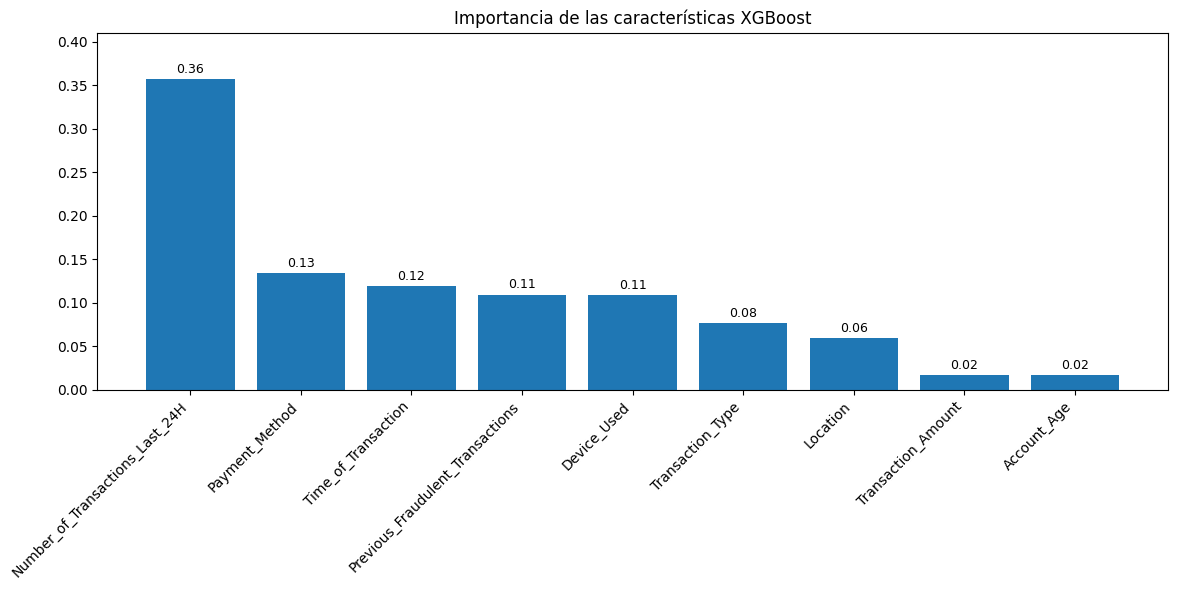

In [111]:
# Modelo ya entrenado
modelo = xgb 
importancias = modelo.feature_importances_
features = X_train.columns

# Ordenar por importancia
indices = np.argsort(importancias)[::-1]
n_features = min(len(importancias), 9)

plt.figure(figsize=(12, 6))
plt.title("Importancia de las características XGBoost")

bars = plt.bar(range(n_features), importancias[indices][:n_features], align="center")
plt.xticks(range(n_features), [features[i] for i in indices[:n_features]], rotation=45, ha='right')

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2,
                 height + max(importancias)*0.01,  # Ajuste proporcional
                 f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, max(importancias)*1.15)  # Ajuste del límite vertical
plt.tight_layout()
plt.show()

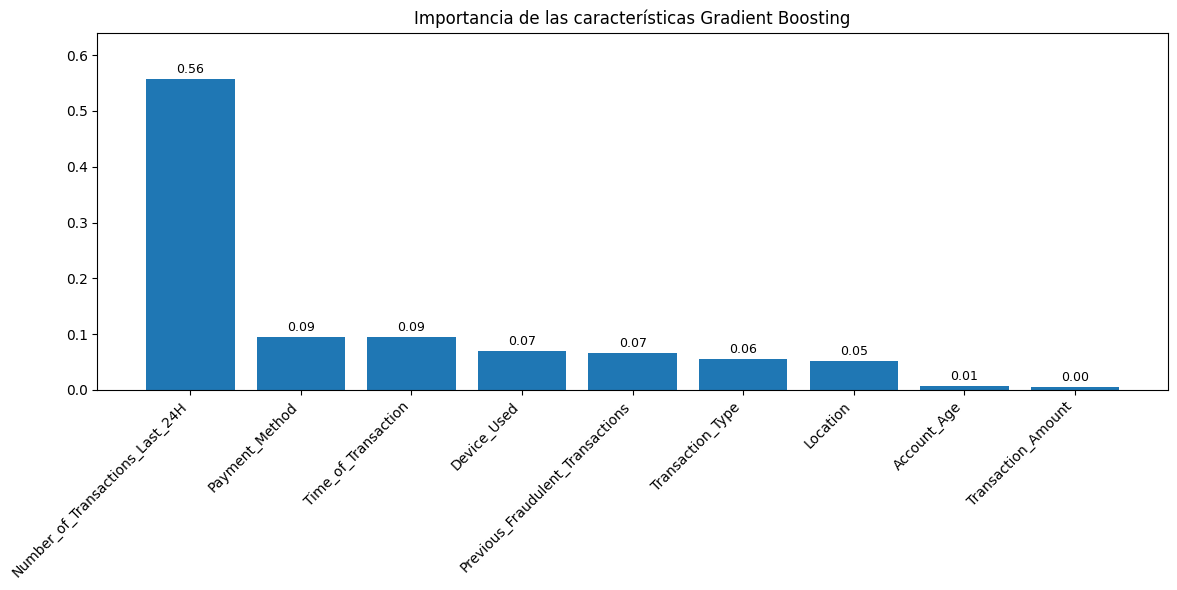

In [110]:
# Modelo ya entrenado
modelo = gb 
importancias = modelo.feature_importances_
features = X_train.columns

# Ordenar por importancia
indices = np.argsort(importancias)[::-1]
n_features = min(len(importancias), 9)

plt.figure(figsize=(12, 6))
plt.title("Importancia de las características Gradient Boosting")

bars = plt.bar(range(n_features), importancias[indices][:n_features], align="center")
plt.xticks(range(n_features), [features[i] for i in indices[:n_features]], rotation=45, ha='right')

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2,
                 height + max(importancias)*0.01,  # Ajuste proporcional
                 f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, max(importancias)*1.15)  # Ajuste del límite vertical
plt.tight_layout()
plt.show()

### **Insights 5**
- La variable Number_of_Transactions_Last_24H es por mucho la más influyente para predecir fraude en ambos modelos.

- Variables como Payment_Method, Time_of_Transaction, Device_Used y Previous_Fraudulent_Transactions también tienen influencia relevante.

- El Gradient Boosting tiene una dependencia exagerada en una sola variable (Number_of_Transactions_Last_24H), lo que podria indicar riesgo de sobreajuste. 



## **Modelo seleccionado**

- Selecciono **XGBoost** como modelo. Este tiene un desempeño muy alto sin memorizar completamente los datos (como Random Forest, Decision Tree o el Gradient Boosting).

- El análisis de importancia de variables muestra una mejor distribución con este modelo, lo cual lo hace más robusto y generalizable.

## **Respuesta a preguntas de investigación dada la importancia de variables**

1. **¿Existe una relación significativa entre el monto de la transacción y la probabilidad de fraude?**
No de forma significativa. La variable Transaction_Amount tuvo una importancia baja en ambos modelos (0.02% en XGB), lo que indica que no es un factor clave en la predicción de fraude.

2. **¿El riesgo de fraude varía dependiendo del tipo de dispositivo utilizado (móvil vs web)?**
Sí, tiene cierta influencia (11%). Device_Used apareció entre las variables moderadamente importantes en ambos modelos, lo que sugiere que el tipo de dispositivo contribuye a identificar fraudes, aunque no es el factor principal.

3. **¿Los clientes nuevos tienen una mayor probabilidad de realizar transacciones fraudulentas?**
No hay evidencia fuerte de eso. La variable Account_Age tuvo una importancia muy baja, por lo que no se puede concluir que los clientes nuevos tengan mayor riesgo de fraude según estos modelos.

